Domain – SEA Transportation

focus – forecast demand

Business challenge/requirement:

SeaPort is the largest operator of Sea Planes across sea shores in Europe. SeaPort doesn't have planes of their own, rather they lease them on a short term basis based on passenger traffic.
You as an ML expert have to build a model to forecast the demand (passenger traffic) of traffic.

Key issues:

As of now utilization of Planes is low due to poor forecasts of traffic

Data volume:

- Approx 144 records – data month wise for last 12 years – file SeaPlaneTravel.csv
Fields in Data
• Month: Month in which traffic data was recorded
• '#Passenger': No of travellers availing Service in that month

Business benefits:

Better utilization of planes will lead to decrease in cost and hence better bottom line

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'D:\E\Courses\Edureka\Assignments\Dataset\module 13. Time series analysis\SeaPlaneTravel.csv')

In [3]:
print(df.shape)
df.head(2)

(144, 2)


,Month,#Passengers
0,2004-01,112
1,2004-02,118


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.columns = ['Month', 'Passengers']

In [8]:
df.set_index('Month', inplace=True)

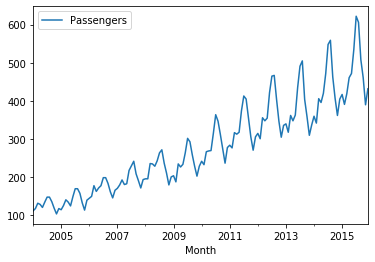

In [9]:
df.plot()

- Checking seasonality with seasonal_decompose

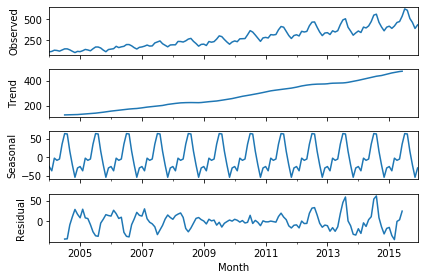

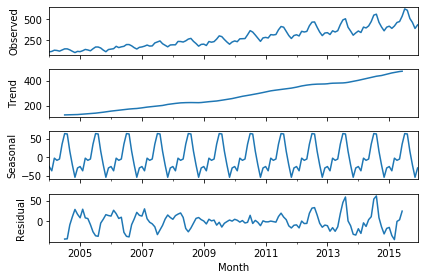

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Passengers'], freq=12)
decomposition.plot()

- using ADF test to know if time series is stationary

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
adfuller(df['Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test Results')
    print('------------------------------------')
    labels = ['ADF Test Statistic', 'P-Value', 'No. of Lags', 'No. of Observations']
    for i,j in zip(labels, result):
        print(i+' : '+str(j))
    if result[1] <= 0.05:
        print('Time series is stationary')
    else:
        print('Time series is not stationary')

In [14]:
adf_check(df['Passengers'])

Augmented Dickey Fuller Test Results
------------------------------------
ADF Test Statistic : 0.8153688792060543
P-Value : 0.9918802434376411
No. of Lags : 13
No. of Observations : 130
Time series is not stationary


In [15]:
df['Passengers_1st_diff'] = df['Passengers'] - df['Passengers'].shift(1)

In [16]:
df.head(2)

,Passengers,Passengers_1st_diff
Month,,
2004-01-01,112,NaN
2004-02-01,118,6.0


In [17]:
adf_check(df['Passengers_1st_diff'].dropna())

Augmented Dickey Fuller Test Results
------------------------------------
ADF Test Statistic : -2.8292668241700034
P-Value : 0.054213290283824954
No. of Lags : 12
No. of Observations : 130
Time series is not stationary


In [18]:
df['Passengers_2nd_diff'] = df['Passengers_1st_diff'] - df['Passengers_1st_diff'].shift(1)

In [19]:
adf_check(df['Passengers_2nd_diff'].dropna())

Augmented Dickey Fuller Test Results
------------------------------------
ADF Test Statistic : -16.384231542468488
P-Value : 2.7328918500143186e-29
No. of Lags : 11
No. of Observations : 130
Time series is stationary


- on second shift we are getting a stationary time seies. so d=2

plot_pacf for finding p value

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


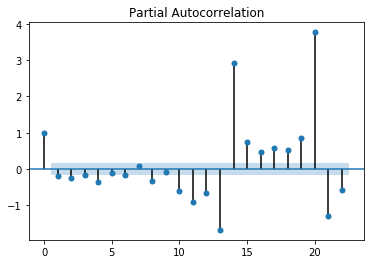

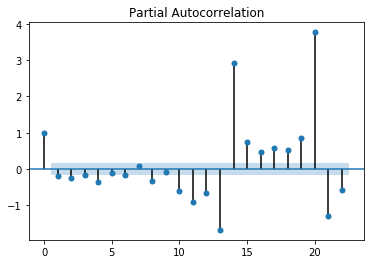

In [21]:
plot_pacf(df['Passengers_2nd_diff'].dropna())

No much correlation observed. so p value can be considered as 0 or 1

plot_acf to find q value

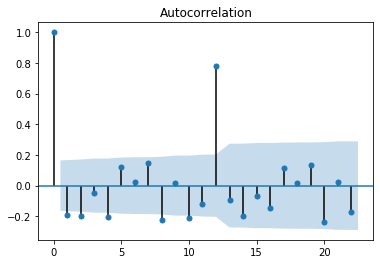

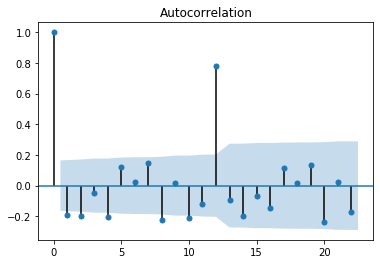

In [22]:
plot_acf(df['Passengers_2nd_diff'].dropna())

In [23]:
df['seasonal_difference'] = df['Passengers'] - df['Passengers'].shift(12)

In [24]:
df

,Passengers,Passengers_1st_diff,Passengers_2nd_diff,seasonal_difference
Month,,,,
2004-01-01,112,NaN,NaN,NaN
2004-02-01,118,6.0,NaN,NaN
2004-03-01,132,14.0,8.0,NaN
2004-04-01,129,-3.0,-17.0,NaN
2004-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
2015-08-01,606,-16.0,-103.0,47.0
2015-09-01,508,-98.0,-82.0,45.0
2015-10-01,461,-47.0,51.0,54.0


In [25]:
adf_check(df['seasonal_difference'].dropna())

Augmented Dickey Fuller Test Results
------------------------------------
ADF Test Statistic : -3.3830207264924805
P-Value : 0.011551493085514982
No. of Lags : 1
No. of Observations : 130
Time series is stationary


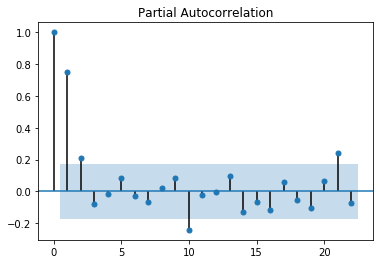

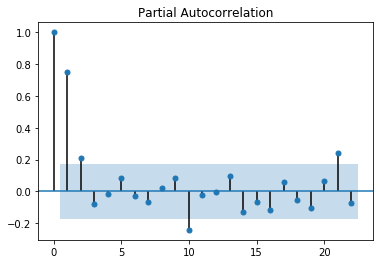

In [26]:
plot_pacf(df['seasonal_difference'].dropna())

P value is 1

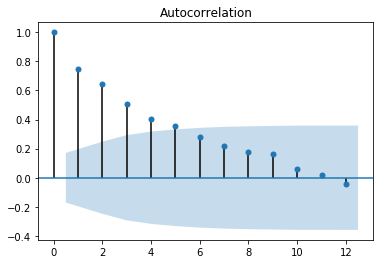

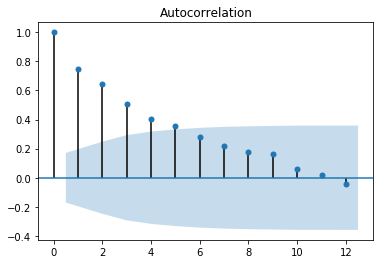

In [27]:
plot_acf(df['seasonal_difference'].dropna(), lags=12)

AR              I              MA
p=1            d=2            q=1     # related to trend
P=1            D=1            Q=3     # related to seasonality

#### Applying ARIMA model

In [28]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [29]:
model = sm.tsa.statespace.SARIMAX(df['Passengers'], order=(1,2,1), seasonal_order=(1,2,3,12))
results = model.fit()
print(results.summary())

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 2, 3, 12)   Log Likelihood                -466.893
Date:                            Fri, 10 Apr 2020   AIC                            947.786
Time:                                    13:53:25   BIC                            967.180
Sample:                                01-01-2004   HQIC                           955.661
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4149      0.082     -5.089      0.000      -0.575      -0.255
ma.L1         -0.9970      0.852   

In [30]:
df['forecast'] = results.predict(start=130, end=144, dynamic=True)

In [31]:
df

,Passengers,Passengers_1st_diff,Passengers_2nd_diff,seasonal_difference,forecast
Month,,,,,
2004-01-01,112,NaN,NaN,NaN,NaN
2004-02-01,118,6.0,NaN,NaN,NaN
2004-03-01,132,14.0,8.0,NaN,NaN
2004-04-01,129,-3.0,-17.0,NaN,NaN
2004-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
2015-08-01,606,-16.0,-103.0,47.0,612.733560
2015-09-01,508,-98.0,-82.0,45.0,505.105446
2015-10-01,461,-47.0,51.0,54.0,446.767399


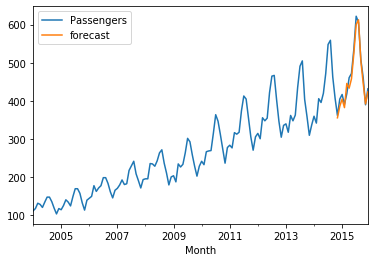

In [32]:
df[['Passengers', 'forecast']].plot()

predictions looks correct on comparing with existing data

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(24)]

In [34]:
future_dates

[Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-02-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-04-01 00:00:00'),
 Timestamp('2016-05-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2016-08-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-10-01 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-04-01 00:00:00'),
 Timestamp('2017-05-01 00:00:00'),
 Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-10-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00')]

In [35]:
future_date_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [36]:
future_date_df.head()

,Passengers,Passengers_1st_diff,Passengers_2nd_diff,seasonal_difference,forecast
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-02-01,NaN,NaN,NaN,NaN,NaN
2016-03-01,NaN,NaN,NaN,NaN,NaN
2016-04-01,NaN,NaN,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN,NaN,NaN


In [37]:
future_df = pd.concat([df, future_date_df])

In [38]:
future_df

,Passengers,Passengers_1st_diff,Passengers_2nd_diff,seasonal_difference,forecast
2004-01-01,112,NaN,NaN,NaN,NaN
2004-02-01,118,6.0,NaN,NaN,NaN
2004-03-01,132,14.0,8.0,NaN,NaN
2004-04-01,129,-3.0,-17.0,NaN,NaN
2004-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
2017-07-01,NaN,NaN,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN,NaN


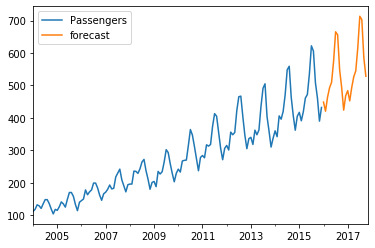

In [39]:
future_df['forecast'] = results.predict(start=144, end=165, dynamic=True)
future_df[['Passengers', 'forecast']].plot()

Next 2 years predictions are plotted above